In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# open the pickle file storage in data folder

data = pd.read_pickle('../data/data-processed.pkl')

sample = data["MLN-EE-76-U-2_CAS-P.PV"].to_frame()

sample

,MLN-EE-76-U-2_CAS-P.PV
Time,
2022-08-30 00:00:00,7105.064941
2022-08-30 00:00:01,7103.961426
2022-08-30 00:00:02,7102.857910
2022-08-30 00:00:03,7101.754395
2022-08-30 00:00:04,7100.650391
...,...
2022-08-30 00:29:56,7146.261719
2022-08-30 00:29:57,7146.866211
2022-08-30 00:29:58,7146.269043


<Axes: xlabel='Time'>

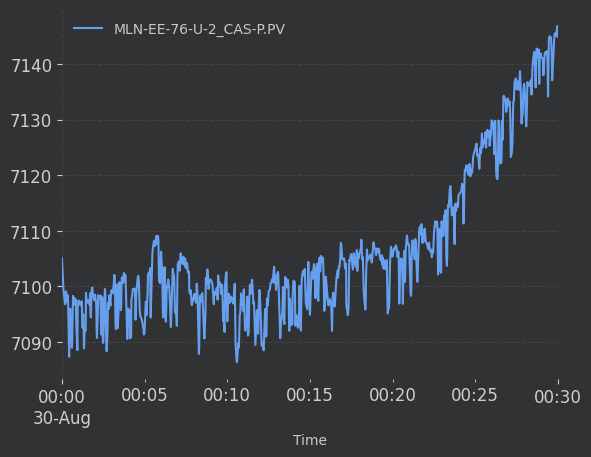

In [50]:
sample.plot()

In [51]:
def apply_dark_mode():
    """https://matplotlib.org/3.5.0/tutorials/introductory/customizing.html
    https://matplotlib.org/3.1.1/tutorials/colors/colors.html"""

    import matplotlib.pyplot as plt
    from matplotlib import cycler

    # import matplotlib as mpl

    colors = cycler(
        "color", ["#669FEE", "#66EE91", "#9988DD", "#EECC55", "#88BB44", "#FFBBBB"]
    )

    plt.rc("figure", facecolor="#313233")
    plt.rc(
        "axes",
        facecolor="#313233",
        edgecolor="none",
        axisbelow=True,
        grid=True,
        prop_cycle=colors,
        labelcolor="0.81",
    )

    plt.rc("grid", color="474A4A", linestyle="--", alpha=0.7)
    plt.rc("xtick", color="0.81", labelsize=12)
    plt.rc("ytick", direction="out", color="0.81", labelsize=12)
    plt.rc("legend", facecolor="#313233", edgecolor="#313233")
    plt.rc("text", color="#C9C9C9")

    plt.rcParams["axes.grid.which"] = "major" 
    plt.rcParams["axes.grid.axis"] = "y"

In [52]:
apply_dark_mode()

<Axes: xlabel='Time'>

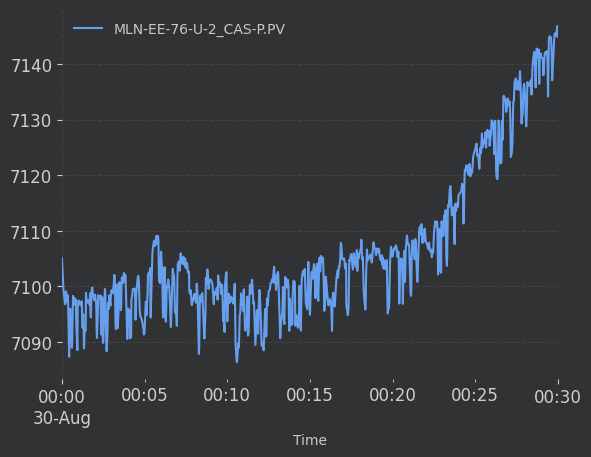

In [53]:
sample.plot()

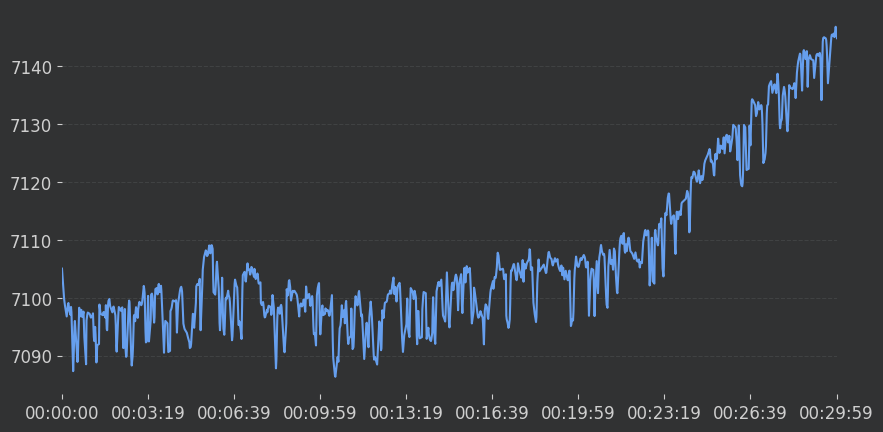

In [54]:
import matplotlib.dates as mdates
import datetime as dt

fig, ax = plt.subplots(figsize=(10, 5))


apply_dark_mode()
line, = ax.plot(sample)

lapse = 10

dx = sample.index
dates = mdates.drange(dx[0], dx[-1], dt.timedelta(seconds=1))
ax.set_xlim(dx[0], dx[-1])
ax.set_xticks(np.linspace(dates[0], dates[-1], lapse))

ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.SecondLocator()))

<Axes: xlabel='Time'>

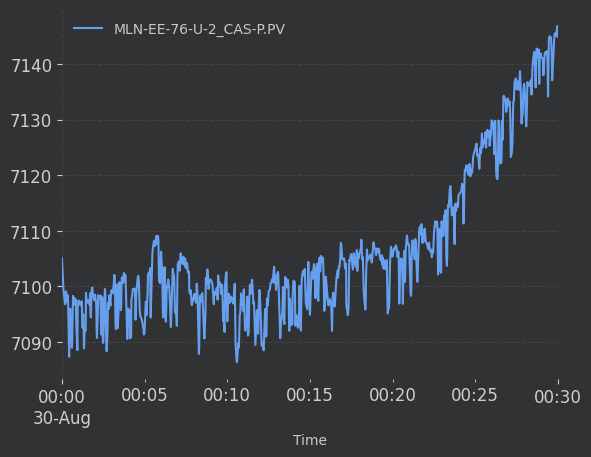

In [55]:
sample.plot()

In [56]:
np.linspace(sample, len(dx)/4)

array([[[7105.064941  ],
        [7103.961426  ],
        [7102.85791   ],
        ...,
        [7146.269043  ],
        [7145.444336  ],
        [7144.892578  ]],

       [[6969.25239118],
        [6968.1713969 ],
        [6967.09040163],
        ...,
        [7009.61559314],
        [7008.8077169 ],
        [7008.26721927]],

       [[6833.43984137],
        [6832.3813678 ],
        [6831.32289327],
        ...,
        [6872.96214329],
        [6872.1710978 ],
        [6871.64186053]],

       ...,

       [[ 721.87509963],
        [ 721.8300582 ],
        [ 721.78501673],
        ...,
        [ 723.55689971],
        [ 723.5232382 ],
        [ 723.50071747]],

       [[ 586.06254982],
        [ 586.0400291 ],
        [ 586.01750837],
        ...,
        [ 586.90344986],
        [ 586.8866191 ],
        [ 586.87535873]],

       [[ 450.25      ],
        [ 450.25      ],
        [ 450.25      ],
        ...,
        [ 450.25      ],
        [ 450.25      ],
        [ 450.25      ]]

In [57]:
# parte 2

In [58]:
#dx = build_frames(data.drop_index(), data.drop_index().columns[0])
data    

from collections import deque

def create_frame(drop_elements:list, dy:deque,) -> pd.DataFrame:#TODO: cambiar el nombre de los parámetros
    lista_frames = []
    while len(drop_elements) > 0:
        dy.append(drop_elements.pop())
        lista_frames.append(dy.copy())
    return lista_frames
def build_frames(data: pd.DataFrame, label: str, window:int=0) -> pd.DataFrame:

    """Storage all the results of processing the deque object
    Also, create global variables por axis formating
    """

    global y_lim_max, y_lim_min
    y_lim_max = data[label].max()
    y_lim_min = data[label].min()
    repeat=True##TODO: El parámetro repeat está en plot_data(), la cosa es que por ahora puedo diferenciar entre dos estilos diferentes de construir el deque
    if not window:
        window = len(data)
        repeat = False
    #
    if repeat:
        drop_elements = list(data[label].values)[-2::-1]
        dy = deque(data[label].values, maxlen=len(data))
    else:
        if isinstance(data[label].iloc[0], pd._libs.tslibs.timestamps.Timestamp):
            print ('Según  ISO 8601: formato estandar para representar fechas y tiempos')
            dy = deque(np.zeros(window), maxlen=window)
        else:
            dy = deque(np.zeros(window)*data[label].iloc[0], maxlen=window)
        drop_elements = list(data[label].values)[-1::-1]
    #
    lista_frames = create_frame(drop_elements, dy)
    row_keys = [f'{i}' for i in range(window)]
    return pd.DataFrame(lista_frames, columns=row_keys)



In [59]:
label =  data.reset_index().columns[0]

if isinstance(data.reset_index()[label].iloc[0], pd._libs.tslibs.timestamps.Timestamp):
    print ('hola mundo')

isinstance(data.reset_index()[label].iloc[0], pd._libs.tslibs.timestamps.Timestamp)

hola mundo


True

## CREAMOS EL FRAME PARA EL EJE X

In [60]:
import datetime as dt
import pandas

dates = build_frames(data.reset_index(), data.reset_index().columns[0])
# esta parte de procesamiento está dentro de data_plot():
dates = dates.replace(0, pd.Timestamp('00:00:00').floor('s')).applymap(lambda x: x.to_pydatetime().strftime('%M:%S'))


Según  ISO 8601: formato estandar para representar fechas y tiempos


In [61]:
dates

,0,1,2,3,4,5,6,7,8,9,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
0,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
1,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:01
2,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:01,00:02
3,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:01,00:02,00:03
4,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:01,00:02,00:03,00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,00:00,00:00,00:00,00:00,00:00,00:01,00:02,00:03,00:04,00:05,...,29:47,29:48,29:49,29:50,29:51,29:52,29:53,29:54,29:55,29:56
1797,00:00,00:00,00:00,00:00,00:01,00:02,00:03,00:04,00:05,00:06,...,29:48,29:49,29:50,29:51,29:52,29:53,29:54,29:55,29:56,29:57
1798,00:00,00:00,00:00,00:01,00:02,00:03,00:04,00:05,00:06,00:07,...,29:49,29:50,29:51,29:52,29:53,29:54,29:55,29:56,29:57,29:58
1799,00:00,00:00,00:01,00:02,00:03,00:04,00:05,00:06,00:07,00:08,...,29:50,29:51,29:52,29:53,29:54,29:55,29:56,29:57,29:58,29:59


In [62]:
dat = dates.iloc[-1]
lapse = 10
eje_x = dat.iloc[-1::-int(len(dat)/lapse)].iloc[-1::-1]
eje_x

0       00:00
180     03:00
360     06:00
540     09:00
720     12:00
900     15:00
1080    18:00
1260    21:00
1440    24:00
1620    27:00
1800    30:00
Name: 1800, dtype: object

## CREAMOS EL FRAME PARA EL CHANNEL

In [63]:
frames = build_frames(sample, sample.columns[0])
frames

,0,1,2,3,4,5,6,7,8,9,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7105.064941
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7105.064941,7103.961426
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7105.064941,7103.961426,7102.857910
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7105.064941,7103.961426,7102.857910,7101.754395
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7105.064941,7103.961426,7102.857910,7101.754395,7100.650391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,0.000000,0.000000,0.000000,0.000000,7105.064941,7103.961426,7102.857910,7101.754395,7100.650391,7099.792969,...,7145.112793,7145.501953,7145.421387,7145.340820,7145.521973,7145.676270,7145.375977,7145.076172,7145.657227,7146.261719
1797,0.000000,0.000000,0.000000,7105.064941,7103.961426,7102.857910,7101.754395,7100.650391,7099.792969,7099.193848,...,7145.501953,7145.421387,7145.340820,7145.521973,7145.676270,7145.375977,7145.076172,7145.657227,7146.261719,7146.866211
1798,0.000000,0.000000,7105.064941,7103.961426,7102.857910,7101.754395,7100.650391,7099.792969,7099.193848,7098.658691,...,7145.421387,7145.340820,7145.521973,7145.676270,7145.375977,7145.076172,7145.657227,7146.261719,7146.866211,7146.269043
1799,0.000000,7105.064941,7103.961426,7102.857910,7101.754395,7100.650391,7099.792969,7099.193848,7098.658691,7098.183105,...,7145.340820,7145.521973,7145.676270,7145.375977,7145.076172,7145.657227,7146.261719,7146.866211,7146.269043,7145.444336


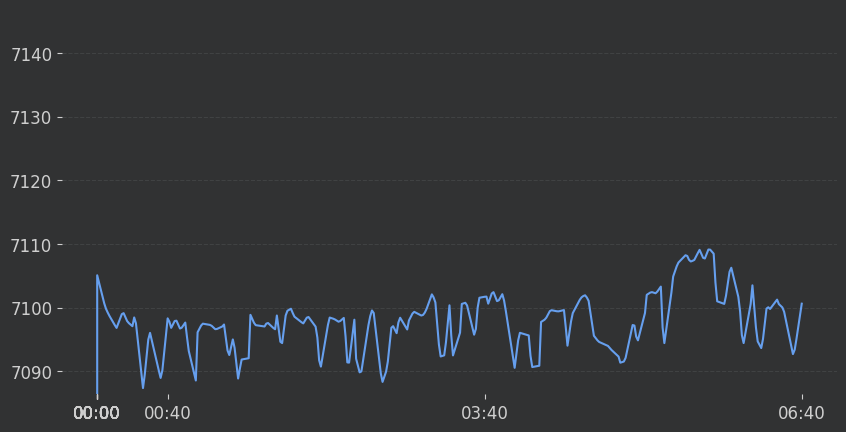

In [74]:
step = 400
lapse = 10

frame = frames.iloc[step]
date = dates.iloc[step]
frame.index = dates.iloc[step]



eje_x = date.iloc[-1::-int(len(date)/lapse)].iloc[-1::-1]

fig, ax = plt.subplots(figsize=(10, 5))

line, = ax.plot(frame)
ax.set_xlim()
ax.set_xticks(eje_x)
ax.set_ylim(y_lim_min, y_lim_max)
plt.show()




In [65]:
eje_x
frame

1800
00:00    7105.064941
00:01    7103.961426
00:02    7102.857910
00:03    7101.754395
00:04    7100.650391
            ...     
29:56    7146.261719
29:57    7146.866211
29:58    7146.269043
29:59    7145.444336
30:00    7144.892578
Name: 1800, Length: 1801, dtype: float64